## 4 - Time Stretch Only with Ferry Downstream Task
## Wav Temporal Order Self-Supervised Learning from Birdsong Applied to Ferry Motor Classification.
Self-Supervised Model, Extracted Weights, and Load into Custom Model

Last Updated Date June 10


In [1]:
from __future__ import print_function
%matplotlib inline
import matplotlib as plt
plt.style.use('seaborn-white')
from IPython.display import Markdown, display
from IPython.display import SVG
import numpy as np
from time import time
np.random.seed(10)
import tensorflow as tf
import pandas as pd
import pyAudioAnalysis
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures, MidTermFeatures
import matplotlib.pyplot as plt
import resampy
import librosa
from librosa import cqt

import scipy.io.wavfile as wavfile 
import librosa
import plotly
import numpy as np
import plotly.graph_objs as go
from scipy.signal import medfilt as mf



import os
import os.path
from os.path import isfile, join
from os import listdir
import sklearn
from sklearn import preprocessing
import scipy.io.wavfile as wavfile
np.set_printoptions(suppress=True)
import argparse
from pydub import AudioSegment
import random

In [2]:
birds_home = os.path.join('/home/pattyry/birds/')
#cwd_audio = os.path.join("..","..","birds")
os.chdir(birds_home)
os.getcwd()

'/home/pattyry/birds'

In [3]:
cqt_train = os.path.join('./cqt-sequences_train')
cqt_test = os.path.join('./cqt-sequences_test')
spec_cqt_train = os.path.join('./spec-aug-sequences_train')
spec_cqt_test = os.path.join('./spec-aug-sequences_test')
new_train_test = os.path.join('./new-train-test')
time_stretch_train = os.path.join('./time-stretch-train')
print(cqt_train)

./cqt-sequences_train


In [4]:
nb_classes = 2
img_rows, img_cols = 70, 112

In [5]:
os.chdir(birds_home)
os.chdir(cqt_train)
os.getcwd()

'/home/pattyry/birds/cqt-sequences_train'

In [6]:
train_x_cqt_1=pd.read_csv('a_train_cqt.csv', sep=',',header=None)
print(train_x_cqt_1.shape)
train_x_cqt_1 = np.asarray(train_x_cqt_1)

train_x_cqt_2=pd.read_csv('b_train_cqt.csv', sep=',',header=None)
print(train_x_cqt_2.shape)
train_x_cqt_2 = np.asarray(train_x_cqt_2)

train_x_cqt_3=pd.read_csv('c_train_cqt.csv', sep=',',header=None)
print(train_x_cqt_3.shape)
train_x_cqt_3 = np.asarray(train_x_cqt_3)

train_x_cqt_4=pd.read_csv('d_train_cqt.csv', sep=',',header=None)
print(train_x_cqt_4.shape)
train_x_cqt_4 = np.asarray(train_x_cqt_4)


train_y_cqt=pd.read_csv('labels_train_cqt.csv', sep=',',header=None)
print(train_y_cqt.shape)
train_y_cqt = np.asarray(train_y_cqt)


(763, 7840)
(763, 7840)
(763, 7840)
(763, 7840)
(763, 2)


In [7]:
os.chdir(birds_home)
os.chdir(cqt_test)
os.getcwd()

'/home/pattyry/birds/cqt-sequences_test'

In [8]:
test_x_cqt_1=pd.read_csv('a_test_cqt.csv', sep=',',header=None)
print(test_x_cqt_1.shape)
test_x_cqt_1 = np.asarray(test_x_cqt_1)

test_x_cqt_2=pd.read_csv('b_test_cqt.csv', sep=',',header=None)
print(test_x_cqt_2.shape)
test_x_cqt_2 = np.asarray(test_x_cqt_2)

test_x_cqt_3=pd.read_csv('c_test_cqt.csv', sep=',',header=None)
print(test_x_cqt_3.shape)
test_x_cqt_3 = np.asarray(test_x_cqt_3)

test_x_cqt_4=pd.read_csv('d_test_cqt.csv', sep=',',header=None)
print(test_x_cqt_4.shape)
test_x_cqt_4 = np.asarray(test_x_cqt_4)

test_y_cqt=pd.read_csv('labels_test_cqt.csv', sep=',',header=None)
print(test_y_cqt.shape)
test_y_cqt = np.asarray(test_y_cqt)

(489, 7840)
(489, 7840)
(489, 7840)
(489, 7840)
(489, 2)


In [9]:
os.chdir(birds_home)
os.chdir(spec_cqt_train)
os.getcwd()
os.listdir()

['b_train.csv',
 'labels_test.csv',
 'd_train.csv',
 'a_train.csv',
 'c_train.csv',
 'labels_train.csv']

In [10]:
train_x_spec_1=pd.read_csv('a_train.csv', sep=',',header=None)
print(train_x_spec_1.shape)
train_x_spec_1 = np.asarray(train_x_spec_1)

train_x_spec_2=pd.read_csv('b_train.csv', sep=',',header=None)
print(train_x_spec_2.shape)
train_x_spec_2 = np.asarray(train_x_spec_2)

train_x_spec_3=pd.read_csv('c_train.csv', sep=',',header=None)
print(train_x_spec_3.shape)
train_x_spec_3 = np.asarray(train_x_spec_3)

train_x_spec_4=pd.read_csv('d_train.csv', sep=',',header=None)
print(train_x_spec_4.shape)
train_x_spec_4 = np.asarray(train_x_spec_4)

train_y_spec=pd.read_csv('labels_train.csv', sep=',',header=None)
print(train_y_spec.shape)
train_y_spec = np.asarray(train_y_spec)

(763, 7840)
(763, 7840)
(763, 7840)
(763, 7840)
(763, 2)


In [11]:
os.chdir(birds_home)
os.chdir(spec_cqt_test)
os.getcwd()
os.listdir()

['labels_test.csv', 'b_test.csv', 'a_test.csv', 'd_test.csv', 'c_test.csv']

In [12]:
test_x_spec_1=pd.read_csv('a_test.csv', sep=',',header=None)
print(test_x_spec_1.shape)
test_x_spec_1 = np.asarray(test_x_spec_1)

test_x_spec_2=pd.read_csv('b_test.csv', sep=',',header=None)
print(test_x_spec_2.shape)
test_x_spec_2 = np.asarray(test_x_spec_2)

test_x_spec_3=pd.read_csv('c_test.csv', sep=',',header=None)
print(test_x_spec_3.shape)
test_x_spec_3 = np.asarray(test_x_spec_3)

test_x_spec_4=pd.read_csv('d_test.csv', sep=',',header=None)
print(test_x_spec_4.shape)
test_x_spec_4 = np.asarray(test_x_spec_4)

test_y_spec=pd.read_csv('labels_test.csv', sep=',',header=None)
print(test_y_spec.shape)
test_y_spec = np.asarray(test_y_spec)

(489, 7840)
(489, 7840)
(489, 7840)
(489, 7840)
(489, 2)


In [13]:
os.chdir(birds_home)
pitch_train = os.path.join(birds_home,'./pitch-shifted_train')
os.chdir(pitch_train)
os.getcwd()
os.listdir()

['c_train_pitch.csv',
 'pitch_shifted_train.csv',
 'b_train_pitch.csv',
 'd_train_pitch.csv',
 'a_train_pitch.csv']

In [14]:
# train_x_pitch_1=pd.read_csv('a_train_pitch.csv', sep=',',header=None)
# print(train_x_pitch_1.shape)
# train_x_pitch_1 = np.asarray(train_x_pitch_1)

# train_x_pitch_2=pd.read_csv('b_train_pitch.csv', sep=',',header=None)
# print(train_x_pitch_2.shape)
# train_x_pitch_2 = np.asarray(train_x_pitch_2)

# train_x_pitch_3=pd.read_csv('c_train_pitch.csv', sep=',',header=None)
# print(train_x_pitch_3.shape)
# train_x_pitch_3 = np.asarray(train_x_pitch_3)

# train_x_pitch_4=pd.read_csv('d_train_pitch.csv', sep=',',header=None)
# print(train_x_pitch_4.shape)
# train_x_pitch_4 = np.asarray(train_x_pitch_4)


(3052, 7840)
(3052, 7840)
(3052, 7840)
(3052, 7840)


In [16]:
os.chdir(birds_home)
time_stretch_train = os.path.join(birds_home,'time-stretch-train')
os.chdir(time_stretch_train)
os.getcwd()
os.listdir()

['sierrabirdsong_444_time_shift_5.wav',
 'sierrabirdsong_723_time_shift_2.wav',
 'sierrabirdsong_890_time_shift_2.wav',
 'sierrabirdsong_820_time_shift_5.wav',
 'sierrabirdsong_943_time_shift_5.wav',
 'sierrabirdsong_56_time_shift_2.wav',
 'sierrabirdsong_758_time_shift_5.wav',
 'sierrabirdsong_486_time_shift_5.wav',
 'sierrabirdsong_292_time_shift_5.wav',
 'sierrabirdsong_495_time_shift_2.wav',
 'sierrabirdsong_369_time_shift_2.wav',
 'sierrabirdsong_596_time_shift_2.wav',
 'sierrabirdsong_890_time_shift_5.wav',
 'sierrabirdsong_687_time_shift_2.wav',
 'sierrabirdsong_929_time_shift_2.wav',
 'sierrabirdsong_717_time_shift_5.wav',
 'sierrabirdsong_475_time_shift_2.wav',
 'sierrabirdsong_378_time_shift_5.wav',
 'sierrabirdsong_44_time_shift_5.wav',
 'sierrabirdsong_407_time_shift_5.wav',
 'sierrabirdsong_500_time_shift_5.wav',
 'sierrabirdsong_841_time_shift_5.wav',
 'sierrabirdsong_417_time_shift_2.wav',
 'sierrabirdsong_601_time_shift_5.wav',
 'sierrabirdsong_592_time_shift_2.wav',
 '

In [20]:
train_x_stretch_1=pd.read_csv('a_stretch_train.csv', sep=',',header=None)
print(train_x_stretch_1.shape)
train_x_stretch_1 = np.asarray(train_x_stretch_1)

train_x_stretch_2=pd.read_csv('b_stretch_train.csv', sep=',',header=None)
print(train_x_stretch_2.shape)
train_x_stretch_2 = np.asarray(train_x_stretch_2)

train_x_stretch_3=pd.read_csv('c_stretch_train.csv', sep=',',header=None)
print(train_x_stretch_3.shape)
train_x_stretch_3 = np.asarray(train_x_stretch_3)

train_x_stretch_4=pd.read_csv('d_stretch_train.csv', sep=',',header=None)
print(train_x_stretch_4.shape)
train_x_stretch_4 = np.asarray(train_x_stretch_4)

(3052, 7840)
(3052, 7840)
(3052, 7840)
(3052, 7840)


In [21]:
# os.chdir(birds_home)
# pitch_test = os.path.join(birds_home,'./pitch-shifted_test')
# os.chdir(pitch_test)
# os.getcwd()
# os.listdir()

In [22]:
# test_x_pitch_1=pd.read_csv('a_test_pitch.csv', sep=',',header=None)
# print(test_x_pitch_1.shape)
# test_x_pitch_1 = np.asarray(test_x_pitch_1)

# test_x_pitch_2=pd.read_csv('b_test_pitch.csv', sep=',',header=None)
# print(test_x_pitch_2.shape)
# test_x_pitch_2 = np.asarray(test_x_pitch_2)

# test_x_pitch_3=pd.read_csv('c_test_pitch.csv', sep=',',header=None)
# print(test_x_pitch_3.shape)
# test_x_pitch_3 = np.asarray(test_x_pitch_3)

# test_x_pitch_4=pd.read_csv('d_test_pitch.csv', sep=',',header=None)
# print(test_x_pitch_4.shape)
# test_x_pitch_4 = np.asarray(test_x_pitch_4)



In [23]:
samples_train_stretch = len(train_x_stretch_4)

In [24]:
train_labels_positive_stretch= np.full((samples_train_stretch, 1), 1)
print(train_labels_positive_stretch.shape)

train_labels_negative_stretch = np.full((samples_train_stretch, 1), 0)
print(train_labels_negative_stretch.shape)


(3052, 1)
(3052, 1)


In [25]:
# Build sets of Samples
# Positive Sequence 
# a, b, c
# Negative Sequences:
# b, a, d
# d, a, b

# train_x_cqt_1, train_x_cqt_2, train_x_cqt_3, train_x_cqt_4
# test_x_cqt_1, test_x_cqt_2, test_x_cqt_3, test_x_cqt_4
# train_y_cqt
# test_y_cqt

# train_x_spec_1, train_x_spec_2, train_x_spec_3, train_x_spec_4
# test_x_spec_1, test_x_spec_2, test_x_spec_3, test_x_spec_4
# train_y_spec
# test_y_spec

In [26]:
samples_train = len(train_x_cqt_1)
samples_test = len(test_x_cqt_1)

train_labels_positive = np.full((samples_train, 1), 1)
print(train_labels_positive.shape)

test_labels_positive = np.full((samples_test, 1), 1)
print(test_labels_positive.shape)

train_labels_negative = np.full((samples_train, 1), 0)
print(train_labels_negative.shape)

test_labels_negative = np.full((samples_test, 1), 0)
print(test_labels_negative.shape)

(763, 1)
(489, 1)
(763, 1)
(489, 1)


In [33]:
positive_train_type1_cqt = np.concatenate((train_x_cqt_1, train_x_cqt_2, train_x_cqt_3, train_labels_positive), axis=1)
positive_test_type1_cqt = np.concatenate((test_x_cqt_1, test_x_cqt_2, test_x_cqt_3, test_labels_positive), axis=1)

negative_train_type2_cqt = np.concatenate((train_x_cqt_2, train_x_cqt_1, train_x_cqt_4, train_labels_negative), axis=1)
negative_test_type2_cqt = np.concatenate((test_x_cqt_2, test_x_cqt_1, test_x_cqt_4, test_labels_negative), axis=1)

negative_train_type3_cqt = np.concatenate((train_x_cqt_4, train_x_cqt_1, train_x_cqt_2, train_labels_negative), axis=1)
negative_test_type3_cqt = np.concatenate((test_x_cqt_4, test_x_cqt_1, test_x_cqt_2, test_labels_negative), axis=1)

In [34]:
positive_train_type1_stretch = np.concatenate((train_x_stretch_1, train_x_stretch_2, train_x_stretch_3, train_labels_positive_stretch), axis=1)

negative_train_type2_stretch = np.concatenate((train_x_stretch_2, train_x_stretch_1, train_x_stretch_4, train_labels_negative_stretch), axis=1)

negative_train_type3_stretch = np.concatenate((train_x_stretch_4, train_x_stretch_1, train_x_stretch_2, train_labels_negative_stretch), axis=1)


In [29]:
# positive_train_type1_spec = np.concatenate((train_x_spec_1, train_x_spec_2, train_x_spec_3, train_labels_positive), axis=1)
# positive_test_type1_spec = np.concatenate((test_x_spec_1, test_x_spec_2, test_x_spec_3, test_labels_positive), axis=1)

# negative_train_type2_spec = np.concatenate((train_x_spec_2, train_x_spec_1, train_x_spec_4, train_labels_negative), axis=1)
# negative_test_type2_spec = np.concatenate((test_x_spec_2, test_x_spec_1, test_x_spec_4, test_labels_negative), axis=1)

# negative_train_type3_spec = np.concatenate((train_x_spec_4, train_x_spec_1, train_x_spec_2, train_labels_negative), axis=1)
# negative_test_type3_spec = np.concatenate((test_x_spec_4, test_x_spec_1, test_x_spec_2, test_labels_negative), axis=1)

### Generate Correct and Incorrect Sequences 

In [30]:
train_cqt = np.append(positive_train_type1_cqt, negative_train_type2_cqt, axis=0)
train_cqt = np.append(train_cqt, negative_train_type3_cqt, axis=0)
print(train_cqt.shape)

test_cqt = np.append(positive_test_type1_cqt,negative_test_type2_cqt, axis=0)
test_cqt = np.append(test_cqt,negative_test_type3_cqt, axis=0)
print(test_cqt.shape)

(2289, 23521)
(1467, 23521)


In [31]:
# train_spec = np.append(positive_train_type1_spec, negative_train_type2_spec, axis=0)
# train_spec = np.append(train_spec, negative_train_type3_spec, axis=0)
# print(train_spec.shape)

# test_spec = np.append(positive_test_type1_spec,negative_test_type2_spec, axis=0)
# test_spec = np.append(test_spec,negative_test_type3_spec, axis=0)
# print(test_spec.shape)

In [35]:
train_stretch = np.append(positive_train_type1_stretch, negative_train_type2_stretch, axis=0)
train_stretch = np.append(train_stretch, negative_train_type3_stretch, axis=0)
print(train_stretch.shape)


(9156, 23521)


In [36]:
os.chdir(birds_home)
#os.chdir(spec_cqt_test)
os.getcwd()
os.listdir()

['self-supervised-temporal-order-2-6-14.hdf5',
 'spec-augment-only-aug-self-supervised-temporal-order--6-14b.hdf5',
 'spec-augment-only-aug-self-supervised-temporal-order--6-14.hdf5',
 'ferry-data',
 'birds-notebooks',
 'time-stretch-train',
 'resampled-train',
 'pitch-shifted_test',
 'spec-aug-sequences_test',
 'cqt-sequences_test',
 'cqt-sequences_train',
 'spec-aug-sequences_train',
 'old-train-test',
 'spec-and-pitchshift-aug-self-supervised-temporal-order--6-14.hdf5',
 'pitchshift-only-aug-self-supervised-temporal-order--6-14b.hdf5',
 'pitch-shifted_train',
 'pitchshift-only-aug-self-supervised-temporal-order--6-14.hdf5',
 'new-train-test',
 'resampled-test',
 'file-index']

In [37]:
np.random.shuffle(train_cqt)
np.random.shuffle(test_cqt)
# np.random.shuffle(train_spec)
# np.random.shuffle(test_spec)
np.random.shuffle(train_stretch)


In [38]:
unrolled_cols = train_cqt.shape[1]
print(unrolled_cols)

23521


In [39]:
train_cqt_y = train_cqt[:,-1]
test_cqt_y = test_cqt[:,-1]

print(train_cqt_y.shape)
print(test_cqt_y.shape)

# train_spec_y = train_spec[:,-1]
# test_spec_y = test_spec[:,-1]

# print(train_spec_y.shape)
# print(test_spec_y.shape)

(2289,)
(1467,)


23521


In [45]:
unrolled_cols = train_stretch.shape[1]
print(unrolled_cols)

train_stretch_y = train_stretch[:,-1]
print(train_stretch_y.shape)


# train_pitch_y = train_pitch[:,-1]
# test_pitch_y = test_pitch[:,-1]

# print(train_pitch_y.shape)
# print(test_pitch_y.shape)

23521
(9156,)


In [46]:
train_cqt_x = train_cqt[:,0:(unrolled_cols-1)]
print(train_cqt_x.shape)

train_stretch_x = train_stretch[:,0:(unrolled_cols-1)]
print(train_stretch_x.shape)

test_cqt_x = test_cqt[:,0:(unrolled_cols-1)]
print(test_cqt_x.shape)

# test_spec_x = test_spec[:,0:(unrolled_cols-1)]
# print(test_spec_x.shape)

(2289, 23520)
(9156, 23520)
(1467, 23520)


In [47]:
os.chdir(birds_home)
os.chdir(new_train_test)
print(os.getcwd())
os.listdir()

/home/pattyry/birds/new-train-test


['train_pitch_y.csv',
 'test_cqt_y.csv',
 'train_spec_x.csv',
 'test_spec_x.csv',
 'test_spec_y.csv',
 'test_pitch_y.csv',
 'train_cqt_x.csv',
 'test_pitch_x.csv',
 'train_spec_y.csv',
 'train_pitch_x.csv',
 'train_cqt_y.csv',
 'self-supervised-temporal-order6-4.hdf5',
 'test_cqt_x.csv']

In [48]:
# np.savetxt('train_cqt_x.csv', train_cqt_x, delimiter=',')  
# np.savetxt('train_spec_x.csv', train_spec_x, delimiter=',')  
# np.savetxt('train_pitch_x.csv', train_spec_x, delimiter=',')  
# np.savetxt('test_cqt_x.csv', test_cqt_x, delimiter=',')  
# np.savetxt('test_spec_x.csv', test_spec_x, delimiter=',')  
# np.savetxt('test_pitch_x.csv', test_spec_x, delimiter=',')  

# np.savetxt('train_spec_y.csv', train_spec_y, delimiter=',')  
# np.savetxt('test_spec_y.csv', test_spec_y, delimiter=',')  
# np.savetxt('train_cqt_y.csv', train_cqt_y, delimiter=',')  
# np.savetxt('test_cqt_y.csv', test_cqt_y, delimiter=',')  
# np.savetxt('train_pitch_y.csv', train_cqt_y, delimiter=',')  
# np.savetxt('test_pitch_y.csv', test_cqt_y, delimiter=',')  

### Choose which augmentations to include

In [49]:
train_x = np.append(train_cqt_x, train_stretch_x, axis=0)
#train_x = np.append(train_x, train_pitch_x, axis=0)

test_x = test_cqt_x 

train_y = np.append(train_cqt_y, train_stretch_y, axis=0)
#train_y = np.append(train_y, train_pitch_y, axis=0)

test_y = test_cqt_y

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)
print(test_y)
print(train_y)

(11445, 23520)
(1467, 23520)
(11445,)
(1467,)
[1. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 1. 0. 0.]


In [50]:
train_labelled = np.asarray(pd.concat([pd.DataFrame(train_x), pd.DataFrame(train_y)], axis=1))
test_labelled = np.asarray(pd.concat([pd.DataFrame(test_x), pd.DataFrame(test_y)], axis=1))
print(train_labelled.shape)
print(test_labelled.shape)


(11445, 23521)
(1467, 23521)


In [51]:
np.random.shuffle(train_labelled)
np.random.shuffle(test_labelled)

In [52]:
test_labelled.shape

(1467, 23521)

In [53]:
train_labelled.shape

(11445, 23521)

In [54]:
num_train_samples = np.shape(train_labelled)[0]
num_train_samples

11445

In [55]:
num_test_samples = np.shape(test_labelled)[0]
num_test_samples

1467

In [56]:
train_y_shuffled = np.asarray(train_labelled)[:,-1]
print(train_y_shuffled.shape)

test_y_shuffled = np.asarray(test_labelled)[:,-1]
print(test_y_shuffled.shape)

train_y_ =  np.array(train_y_shuffled).reshape(num_train_samples)
test_y_ =  np.array(test_y_shuffled).reshape(num_test_samples)
print(train_y_)
print(test_y_)

(11445,)
(1467,)
[1. 1. 0. ... 0. 0. 0.]
[0. 1. 0. ... 0. 0. 0.]


In [57]:
train_x_shuffled = np.asarray(train_labelled)[:,0:(unrolled_cols-1)]
print(train_x_shuffled.shape)

test_x_shuffled = np.asarray(test_labelled)[:,0:(unrolled_cols-1)]
print(test_x_shuffled.shape)

(11445, 23520)
(1467, 23520)


In [58]:
# train_x_shuffled, train_y_shuffled
# test_x_shuffled, test_y_shuffled

#7840

## Shape Data for Model Inputs

In [59]:
# Split 'x' series back into sequences
train_x_1 = train_x_shuffled[:,0:7840]
train_x_2 = train_x_shuffled[:,7840:15680]
train_x_3 = train_x_shuffled[:,15680:]
print(train_x_3.shape)

(11445, 7840)


In [60]:
train_x_1 = train_x_shuffled[:,0:7840]
train_x_2 = train_x_shuffled[:,7840:15680]
train_x_3 = train_x_shuffled[:,15680:]

test_x_1 = test_x_shuffled[:,0:7840]
test_x_2 = test_x_shuffled[:,7840:15680]
test_x_3 = test_x_shuffled[:,15680:]

In [61]:
#Define Single input shape
num_test_samples = test_x_shuffled.shape[0]
num_train_samples = train_x_shuffled.shape[0]
num_timesteps = 70
num_features = 112
print(num_test_samples)
print(num_train_samples)
print(num_timesteps)
print(num_features)

1467
11445
70
112


In [62]:
train_x_1 = np.array(train_x_1).reshape(num_train_samples, num_timesteps, num_features, 1)
train_x_2 = np.array(train_x_2).reshape(num_train_samples, num_timesteps, num_features, 1)
train_x_3 = np.array(train_x_3).reshape(num_train_samples, num_timesteps, num_features, 1)
print(train_x_1.shape)

test_x_1 = np.array(test_x_1).reshape(num_test_samples, num_timesteps, num_features, 1)
test_x_2 = np.array(test_x_2).reshape(num_test_samples, num_timesteps, num_features, 1)
test_x_3 = np.array(test_x_3).reshape(num_test_samples, num_timesteps, num_features, 1)
print(test_x_1.shape)

(11445, 70, 112, 1)
(1467, 70, 112, 1)


In [63]:
print(test_x_1.shape)
print(train_x_1.shape)
      
print(test_x_2.shape)
print(train_x_2.shape)

print(test_x_3.shape)
print(train_x_3.shape)

train_x_1 = np.float32(train_x_1)
test_x_1 = np.float32(test_x_1)

train_x_2 = np.float32(train_x_2)
test_x_2 = np.float32(test_x_2)

train_x_3 = np.float32(train_x_3)
test_x_3 = np.float32(test_x_3)


(1467, 70, 112, 1)
(11445, 70, 112, 1)
(1467, 70, 112, 1)
(11445, 70, 112, 1)
(1467, 70, 112, 1)
(11445, 70, 112, 1)


In [64]:
cqt_input_shape = train_x_1[0].shape
print(cqt_input_shape)
print(train_x_1.shape)
type(train_x_1)


(70, 112, 1)
(11445, 70, 112, 1)


numpy.ndarray

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import pywt
from matplotlib.image import imread
import numpy as np
import os
from scipy.io import wavfile
from pathlib import Path
import pywt
#import soundfile
import random
import pickle
from glob import iglob
from sklearn.metrics import confusion_matrix, classification_report
import pprint
random.seed(42)
import librosa
import scipy.signal
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import MaxPooling2D, Flatten, Conv2D
from tensorflow.keras.utils import to_categorical
import tensorflow.keras
from tensorflow.keras import initializers 
from tensorflow.keras import regularizers 
from tensorflow.keras import constraints 
from tensorflow.keras.layers import Activation
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import ELU
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import optimizers, losses, activations, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D,concatenate
from tensorflow.keras.layers import MaxPooling3D, Flatten, Conv3D
from tensorflow.keras import backend as K
from tensorflow.keras.layers import LeakyReLU,PReLU
import tensorflow.keras
from tensorflow.keras.losses import *
from tensorflow.keras.models import load_model
# def my_init(shape,  dtype=None):
#      vals=((float(shape[0], float(shape[1]))) * math.sqrt(2./float(shape[1])))
#      return K.random_normal(vals, dtype=dtype)    
import math


Using TensorFlow backend.


In [66]:
#Before prediction
K.clear_session()
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession
tf.compat.v1.disable_eager_execution()
# # #session = InteractiveSession.close()
# config = ConfigProto()
# config.gpu_options.allow_growth = True

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

from tensorflow.python.framework import ops
ops.reset_default_graph()

Num GPUs Available:  0


In [67]:
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="1"
len(train_y)
unique, counts = np.unique(train_y_, return_counts=True)
print(unique)
print(counts)

[0. 1.]
[7630 3815]


In [68]:
# If wanted, add class weighting
total_len = len(train_y)
class_weight = {0: total_len/len([x for x in train_y_==0 if x]),
                1: total_len/len([x for x in train_y_==1 if x])}

In [69]:
def get_model():
    with tf.device("GPU:1"):
        nclass = 2
        initializer1 = tf.keras.initializers.RandomNormal
        initializer2 = tf.keras.initializers.Zeros()
        initializer3 = tf.keras.initializers.glorot_uniform(seed=None)
        initializer4 = tf.keras.initializers.lecun_normal(seed=None)
        initializer5 = tf.keras.initializers.TruncatedNormal(mean=0., stddev=1.)

        inp = Input(shape=cqt_input_shape)
        img_1 = LeakyReLU(alpha=0.3)(inp)
        img_1 = Conv2D(128, kernel_size=(7,7), 
                       kernel_initializer=initializer4,  kernel_regularizer = regularizers.l2(0.001),         
                       use_bias=True, bias_initializer=initializers.Zeros(),padding="valid")(img_1)
        img_1 = Dropout(0.3)(img_1)
        img_1 = LeakyReLU(alpha=0.2)(img_1)
        img_1 = MaxPooling2D()(img_1)
        img_1 = Conv2D(128, kernel_size=(3,3),       
                       kernel_initializer=initializer4, kernel_regularizer = regularizers.l2(0.001),            
                       use_bias=True, bias_initializer=initializers.Zeros(),padding="valid")(img_1)
        img_1 = LeakyReLU(alpha=0.2)(img_1)
        img_1 = MaxPooling2D()(img_1)
        img_1 = Dropout(0.3)(img_1)
        img_1 = Conv2D(256, kernel_size=(3,3),       
                       kernel_initializer=initializer4, kernel_regularizer = regularizers.l2(0.001),            
                       use_bias=True, bias_initializer=initializers.Zeros(),padding="valid")(img_1)
        img_1 = LeakyReLU(alpha=0.2)(img_1)
        img_1 = Dropout(0.5)(img_1)   
        img_1 = Flatten()(img_1)      
        img_1 = Dense(512, kernel_initializer=initializer4,  kernel_regularizer = regularizers.l2(0.001))(img_1)
        img_1 = LeakyReLU(alpha=0.2)(img_1)
        img_1 = Dropout(0.5)(img_1)   
        

        inp2 = Input(shape=cqt_input_shape)
        img_2 = LeakyReLU(alpha=0.2)(inp2)
        img_2 = Conv2D(128, kernel_size=(7,7), 
                       kernel_initializer=initializer4,  kernel_regularizer = regularizers.l2(0.001),         
                       use_bias=True, bias_initializer=initializers.Zeros())(img_2)
        img_2 = Dropout(0.3)(img_2)
        img_2 = LeakyReLU(alpha=0.2)(img_2)
        img_2 = MaxPooling2D()(img_2)
        img_2 = Conv2D(128, kernel_size=(3,3),       
                       kernel_initializer=initializer4, kernel_regularizer = regularizers.l2(0.001),            
                       use_bias=True, bias_initializer=initializers.Zeros(),padding="valid")(img_2)
        img_2 = LeakyReLU(alpha=0.2)(img_2)
        img_2 = MaxPooling2D()(img_2)
        img_2 = Dropout(0.3)(img_2)

        img_2 = Conv2D(256, kernel_size=(3,3),       
                       kernel_initializer=initializer4, kernel_regularizer = regularizers.l2(0.001),            
                       use_bias=True, bias_initializer=initializers.Zeros(),padding="valid")(img_2)
        img_2 = LeakyReLU(alpha=0.2)(img_2)
        img_2 = Dropout(0.5)(img_2)
        img_2 = Flatten()(img_2)   

        img_2 = Dense(512, kernel_initializer=initializer4,  kernel_regularizer = regularizers.l2(0.001))(img_2)
        img_2 = LeakyReLU(alpha=0.2)(img_2)
        img_2 = Dropout(0.5)(img_2)


        inp3 = Input(shape=cqt_input_shape)
        img_3 = LeakyReLU(alpha=0.2)(inp3)
        img_3 = Conv2D(128, kernel_size=(7,7), 
                       kernel_initializer=initializer4,  kernel_regularizer = regularizers.l2(0.001),         
                       use_bias=True, bias_initializer=initializers.Zeros(),padding="valid")(img_3)
        img_3 = Dropout(0.3)(img_3)
        img_3 = LeakyReLU(alpha=0.2)(img_3)
        img_3 = MaxPooling2D()(img_3)
        img_3 = Conv2D(128, kernel_size=(3,3),       
                       kernel_initializer=initializer4, kernel_regularizer = regularizers.l2(0.001),            
                       use_bias=True, bias_initializer=initializers.Zeros(),padding="valid")(img_3)
        img_3 = LeakyReLU(alpha=0.2)(img_3)
        img_3 = MaxPooling2D()(img_3)
        img_3 = Dropout(0.3)(img_3)

        img_3 = Conv2D(256, kernel_size=(3,3),       
                       kernel_initializer=initializer4, kernel_regularizer = regularizers.l2(0.001),            
                       use_bias=True, bias_initializer=initializers.Zeros(),padding="valid")(img_3)
        img_3 = LeakyReLU(alpha=0.2)(img_3)
        img_3 = Dropout(0.5)(img_3)
        img_3 = Flatten()(img_3)   

        img_3 = Dense(512, kernel_initializer=initializer4,   kernel_regularizer = regularizers.l2(0.001))(img_3)
        img_3 = LeakyReLU(alpha=0.2)(img_3)
        img_3 = Dropout(0.5)(img_3)


        concat_layer = keras.layers.concatenate([img_1, img_2, img_3])
        concat_dense = LeakyReLU(alpha=0.2)(concat_layer)
        concat_dense = Dense(256, kernel_initializer=initializer4,  kernel_regularizer = regularizers.l2(0.001),
                             bias_initializer=initializers.Zeros(),use_bias=True)(concat_dense)
        concat_dense = Dropout(0.5)(concat_dense)
        concat_dense = Dense(16, kernel_regularizer = regularizers.l2(0.1))(concat_dense)
        concat_dense = Dropout(0.5)(concat_dense)   

        output_layer = Dense(2,activation=activations.sigmoid)(concat_dense)
        model = models.Model(inputs=[inp, inp2, inp3], outputs=[output_layer])
        opt = optimizers.Adam(lr=0.0009, beta_1=0.9, beta_2=0.999, epsilon=1e-5, decay=.03, amsgrad=False)
        model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=['acc'])

        model.summary()


        return model

In [70]:
cqt_order_model = get_model()

W0614 21:03:53.843501 139664110520064 deprecation.py:506] From /opt/anaconda3/envs/gansynth/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0614 21:03:53.847228 139664110520064 deprecation.py:506] From /opt/anaconda3/envs/gansynth/lib/python3.6/site-packages/tensorflow/python/keras/initializers.py:94: calling TruncatedNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0614 21:03:54.328343 139664110520064 deprecation.py:323] From /opt/anaconda3/envs/gansynth/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_disp

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 70, 112, 1)] 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 70, 112, 1)] 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 70, 112, 1)] 0                                            
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 70, 112, 1)   0           input_1[0][0]                    
______________________________________________________________________________________________

In [71]:
cqt_order_model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.training.Model object at 0x7f056763bcf8>>

In [72]:
mcp_save = ModelCheckpoint('time_stretch-only-aug-self-supervised-temporal-order--6-14.hdf5', save_best_only=True, monitor='val_acc', mode='max')
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                  factor=.2, 
                                  patience=1, 
                                  verbose=0, 
                                  mode='auto', 
                                  min_delta=0.00001, 
                                  cooldown=0, 
                                  min_lr=0)
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
birds_home = os.path.join('/home/pattyry/birds/')
#cwd_audio = os.path.join("..","..","birds")
os.chdir(birds_home)
os.getcwd()

'/home/pattyry/birds'

In [81]:
history = cqt_order_model.fit([train_x_1, train_x_2, train_x_3],[to_categorical(train_y_)], 
                         epochs=10,
                         #verbose=2, 
                         batch_size=240,
                         validation_data=([test_x_1, test_x_2,test_x_3], to_categorical(test_y_)),
                         callbacks=[mcp_save, reduce_lr],
                         class_weight=class_weight)

Train on 11445 samples, validate on 1467 samples
Epoch 1/10
11445/11445 [==============================] - 405s 35ms/sample - loss: 1.8242 - acc: 0.8307 - val_loss: 1.5849 - val_acc: 0.7362
Epoch 2/10
11445/11445 [==============================] - 409s 36ms/sample - loss: 1.7817 - acc: 0.8279 - val_loss: 1.5207 - val_acc: 0.7471
Epoch 3/10
11445/11445 [==============================] - 400s 35ms/sample - loss: 1.7344 - acc: 0.8349 - val_loss: 1.5004 - val_acc: 0.7386
Epoch 4/10
11445/11445 [==============================] - 400s 35ms/sample - loss: 1.6933 - acc: 0.8359 - val_loss: 1.4861 - val_acc: 0.7342
Epoch 5/10
11445/11445 [==============================] - 400s 35ms/sample - loss: 1.6525 - acc: 0.8383 - val_loss: 1.4335 - val_acc: 0.7403
Epoch 6/10
11445/11445 [==============================] - 400s 35ms/sample - loss: 1.6270 - acc: 0.8364 - val_loss: 1.4401 - val_acc: 0.7287
Epoch 7/10
11445/11445 [==============================] - 400s 35ms/sample - loss: 1.5906 - acc: 0.8453 -

In [82]:
import sys
os.path.dirname(sys.executable)

'/opt/anaconda3/envs/gansynth/bin'

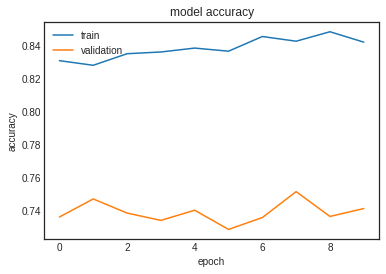

In [83]:
import matplotlib.pyplot as plt
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

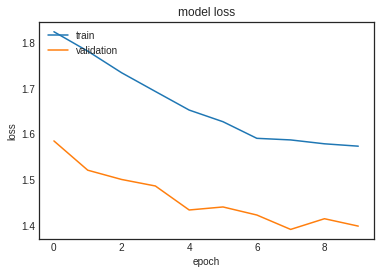

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [85]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model


## Self-Supervised Learning

In [86]:
os.getcwd()

'/home/pattyry/birds'

In [87]:
# cwd_audio = os.path.join("..","..","birds-data")
os.chdir(birds_home)
os.getcwd()

'/home/pattyry/birds'

In [89]:
from azure.storage.blob import BlockBlobService

In [90]:
block_blob_service = BlockBlobService(
    account_name='videotaggingstorage', account_key='cjA2Qw1hYEX4/RK1q4qhnJx2Rjo8qbCB2IIhfoRuTslENLAetCjA3YlUB876tw1ArLnsWxnJ1bo9ylRaoDSjBg==')

In [91]:
def upload_to_blob(block_blob_service, local_dir, container_name):
    obj_list = [f for f in Path(local_dir).rglob('*.hdf5')]
    
    for path_obj in obj_list:
        print(path_obj.name)
        block_blob_service.create_blob_from_path(
            container_name, path_obj.name, str(path_obj))

In [92]:
upload_to_blob(block_blob_service, birds_home, 'models-trained-birdsong')

self-supervised-temporal-order-2-6-14.hdf5
spec-augment-only-aug-self-supervised-temporal-order--6-14b.hdf5
spec-augment-only-aug-self-supervised-temporal-order--6-14.hdf5
spec-and-pitchshift-aug-self-supervised-temporal-order--6-14.hdf5
pitchshift-only-aug-self-supervised-temporal-order--6-14b.hdf5
pitchshift-only-aug-self-supervised-temporal-order--6-14.hdf5
time_stretch-only-aug-self-supervised-temporal-order--6-14.hdf5
spec_augment_only_ferry_pretrained_6-14.hdf5
spec-and-pitch-augment_ferry_pretrained_6-14.hdf5
best_ferry_pretrained_6-7.hdf5
best_ferry_pretrained_6-13.hdf5
self-supervised-temporal-order6-4.hdf5
self-supervised-temporal-order6-4.hdf5


KeyboardInterrupt: 

In [ ]:
model = load_model('time_stretch-only-aug-self-supervised-temporal-order--6-14.hdf5')

In [94]:
x1 = keras.Input(shape =(cqt_input_shape))
x2 = keras.Input(shape =(cqt_input_shape))
x3 = keras.Input(shape =(cqt_input_shape))

inputs=[x1, x2, x3]

In [95]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'input_1': <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f02600616d8>, 'input_2': <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f02600617f0>, 'input_3': <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f0260061a58>, 'leaky_re_lu': <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x7f0260061da0>, 'leaky_re_lu_5': <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x7f026006b0f0>, 'leaky_re_lu_10': <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x7f026006b390>, 'conv2d': <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f026006b4a8>, 'conv2d_3': <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f026006b978>, 'conv2d_6': <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f026006be48>, 'dropout': <tensorflow.python.keras.layers.core.Dropout object at 0x7f0260072358>, 'dropout_4': <tensorflow.python.keras.layer

In [96]:
weights_list = []
for layer in model.layers[:45:3]:
  layer_name = layer.name
  # print(layer.name)
  layer.set_weights(layer_dict[layer_name].get_weights())
  print(layer.get_weights())
  #print(type(np.asarray(layer.get_weights)))
  x = (np.asarray(layer.get_weights()))

  weights_list.append(np.asarray(x))


[]
[]
[array([[[[-0.09670813,  0.09401999, -0.05476946, ..., -0.00995189,
          -0.04839139,  0.03554846]],

        [[-0.11694983, -0.07034617,  0.11980227, ...,  0.04976582,
           0.02547461, -0.07697546]],

        [[-0.00741789, -0.201195  , -0.0114362 , ...,  0.07688002,
          -0.10015621, -0.02277113]],

        ...,

        [[-0.14328611, -0.05081897,  0.07566343, ..., -0.20223601,
           0.0614266 , -0.0595354 ]],

        [[-0.06280474, -0.19982904, -0.10611038, ...,  0.16434214,
           0.07411341, -0.08231254]],

        [[ 0.12389632, -0.03803743, -0.01053733, ..., -0.07349288,
           0.02116372,  0.07246886]]],


       [[[ 0.03280466, -0.08177955, -0.09326874, ..., -0.23345639,
          -0.00958155, -0.18220465]],

        [[-0.03722149, -0.06272786,  0.04707695, ...,  0.22154765,
           0.00955666,  0.25854805]],

        [[ 0.2093057 ,  0.22461519,  0.00216204, ..., -0.10513069,
           0.06521329, -0.01050968]],

        ...,

        [

[array([[[[ 0.01982267, -0.02172431,  0.01095984, ..., -0.02291341,
           0.00521749,  0.00827282],
         [-0.01401334,  0.01536765, -0.01568324, ..., -0.01353225,
          -0.01538809, -0.00983963],
         [ 0.01140119,  0.01052953,  0.014571  , ..., -0.02018391,
           0.00991939, -0.00131908],
         ...,
         [ 0.00519367,  0.03355564,  0.03768148, ..., -0.00978466,
          -0.01246497, -0.00241497],
         [-0.00911415,  0.00868887, -0.017529  , ...,  0.00861251,
           0.00282092,  0.00245838],
         [ 0.00038494,  0.00531566,  0.00431678, ..., -0.02730752,
          -0.00222358,  0.00417177]],

        [[-0.03102087,  0.0172758 , -0.00150657, ..., -0.01176267,
          -0.00462654, -0.01143533],
         [-0.03389181, -0.00244338,  0.00901156, ..., -0.01832554,
          -0.01146119, -0.00085596],
         [ 0.00085054, -0.02392274, -0.00583739, ..., -0.00051289,
           0.0045994 , -0.00185808],
         ...,
         [ 0.00357626, -0.0202078

[array([[-0.00007926,  0.00069217,  0.00061724, ...,  0.00117893,
        -0.00000574, -0.0017252 ],
       [ 0.0004148 ,  0.00095981, -0.00015002, ...,  0.00062655,
        -0.00001089, -0.00042384],
       [ 0.00005499,  0.00100516,  0.00008011, ..., -0.00047676,
        -0.00002519, -0.00199   ],
       ...,
       [ 0.00023225,  0.0012672 , -0.00047553, ...,  0.00016833,
        -0.00001356,  0.00107588],
       [-0.00005778,  0.00077818, -0.0000522 , ..., -0.00024465,
        -0.00001037, -0.00063374],
       [ 0.00040089, -0.00131619,  0.00429125, ...,  0.00119576,
         0.0000008 , -0.0013465 ]], dtype=float32), array([-0.00181152,  0.00709186, -0.00317383, -0.00737722, -0.00757863,
       -0.0041854 , -0.00593484, -0.007502  , -0.00023938, -0.00562213,
        0.00952655, -0.00297184, -0.00237293,  0.00023958, -0.00172957,
        0.00476006,  0.00506988, -0.00516016, -0.00602844,  0.00144947,
       -0.00671631,  0.00435989, -0.00754887, -0.00589116, -0.00415055,
        0.

In [97]:
def get_model2():
    with tf.device("GPU:1"):
        nclass = 2
        initializer1 = tf.keras.initializers.RandomNormal
        initializer2 = tf.keras.initializers.Zeros()
        initializer3 = tf.keras.initializers.glorot_uniform(seed=None)
        initializer4 = tf.keras.initializers.lecun_normal(seed=None)
        initializer5 = tf.keras.initializers.TruncatedNormal(mean=0., stddev=1.)

        inp = Input(shape=cqt_input_shape)
        img_1 = LeakyReLU(alpha=0.3)(inp)
        img_1 = Conv2D(128, kernel_size=(7,7), 
                       # kernel_initializer=initializer4,  
                       trainable = False,
                       # kernel_regularizer = regularizers.l2(0.01),         
                       #use_bias=True, 
                       #bias_initializer=initializers.Zeros(),
                       padding="valid")(img_1)
        img_1 = Dropout(0.1)(img_1)
        img_1 = LeakyReLU(alpha=0.2)(img_1)
        img_1 = MaxPooling2D()(img_1)
        img_1 = Conv2D(128, kernel_size=(3,3),       
                       # kernel_initializer=initializer4, 
                       trainable = False,
                       # kernel_regularizer = regularizers.l2(0.01),            
                       #use_bias=True, 
                       #bias_initializer=initializers.Zeros(),
                       padding="valid")(img_1)
        img_1 = LeakyReLU(alpha=0.2)(img_1)
        img_1 = MaxPooling2D()(img_1)
        img_1 = Dropout(0.1)(img_1)
        img_1 = Conv2D(256, kernel_size=(3,3),       
                       # kernel_initializer=initializer4, 
                       # kernel_regularizer = regularizers.l2(0.01), 
                       trainable = False,
                       #use_bias=True, 
                       #bias_initializer=initializers.Zeros(),
                       padding="valid")(img_1)
        img_1 = LeakyReLU(alpha=0.2)(img_1)
        img_1 = Dropout(0.1)(img_1)   
        img_1 = Flatten()(img_1)      
        img_1 = Dense(512, 
                      # kernel_initializer=initializer4,  
                      kernel_regularizer = regularizers.l2(0.001),
                      # trainable = False,
                     )(img_1)
        img_1 = LeakyReLU(alpha=0.2)(img_1)
        img_1 = Dropout(0.1)(img_1)   
        
        img_1 = Dense(128, kernel_initializer=initializer4, trainable = True,
                             kernel_regularizer = regularizers.l2(0.001),
                             use_bias=True, 
                             bias_initializer=initializer4,
                            )(img_1)
        img_1 = LeakyReLU(alpha=0.2)(img_1)
        img_1 = Dropout(0.4)(img_1)   

        img_1 = Dense(16, kernel_initializer=initializer4, trainable = True,
                             kernel_regularizer = regularizers.l2(0.01),
                             use_bias=True, 
                             bias_initializer=initializer4,
                            )(img_1)
        img_1 = LeakyReLU(alpha=0.2)(img_1)
        img_1 = Dropout(0.4)(img_1)   


        # 32 .3


        output_layer = Dense(2,activation=activations.sigmoid)(img_1)
        model = models.Model(inputs=[inp], outputs=[output_layer])
        opt = optimizers.Adam(lr=0.00005, beta_1=0.9, beta_2=0.999, epsilon=1e-5, decay=.03, amsgrad=False)
        model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=['acc'])

        model.summary()


        return model

In [98]:
#Before prediction
K.clear_session()
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession
tf.compat.v1.disable_eager_execution()
# # #session = InteractiveSession.close()
# config = ConfigProto()
# config.gpu_options.allow_growth = True



from tensorflow.python.framework import ops
ops.reset_default_graph()

In [99]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [100]:
pre_trained = get_model2()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 70, 112, 1)]      0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 70, 112, 1)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 106, 128)      6400      
_________________________________________________________________
dropout (Dropout)            (None, 64, 106, 128)      0         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 106, 128)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 53, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 51, 128)       147584

In [101]:
indexlayers = [2,6,10,14]
for layerweight in indexlayers:

    pre_trained.layers[layerweight].set_weights(weights_list[layerweight])   
    print(weights_list[layerweight])


for indexlayer in indexlayers:    
    layer = pre_trained.layers[indexlayer]
    layer.trainable =  False


[array([[[[-0.09670813,  0.09401999, -0.05476946, ..., -0.00995189,
          -0.04839139,  0.03554846]],

        [[-0.11694983, -0.07034617,  0.11980227, ...,  0.04976582,
           0.02547461, -0.07697546]],

        [[-0.00741789, -0.201195  , -0.0114362 , ...,  0.07688002,
          -0.10015621, -0.02277113]],

        ...,

        [[-0.14328611, -0.05081897,  0.07566343, ..., -0.20223601,
           0.0614266 , -0.0595354 ]],

        [[-0.06280474, -0.19982904, -0.10611038, ...,  0.16434214,
           0.07411341, -0.08231254]],

        [[ 0.12389632, -0.03803743, -0.01053733, ..., -0.07349288,
           0.02116372,  0.07246886]]],


       [[[ 0.03280466, -0.08177955, -0.09326874, ..., -0.23345639,
          -0.00958155, -0.18220465]],

        [[-0.03722149, -0.06272786,  0.04707695, ...,  0.22154765,
           0.00955666,  0.25854805]],

        [[ 0.2093057 ,  0.22461519,  0.00216204, ..., -0.10513069,
           0.06521329, -0.01050968]],

        ...,

        [[ 0.06

[array([[[[ 0.01982267, -0.02172431,  0.01095984, ..., -0.02291341,
           0.00521749,  0.00827282],
         [-0.01401334,  0.01536765, -0.01568324, ..., -0.01353225,
          -0.01538809, -0.00983963],
         [ 0.01140119,  0.01052953,  0.014571  , ..., -0.02018391,
           0.00991939, -0.00131908],
         ...,
         [ 0.00519367,  0.03355564,  0.03768148, ..., -0.00978466,
          -0.01246497, -0.00241497],
         [-0.00911415,  0.00868887, -0.017529  , ...,  0.00861251,
           0.00282092,  0.00245838],
         [ 0.00038494,  0.00531566,  0.00431678, ..., -0.02730752,
          -0.00222358,  0.00417177]],

        [[-0.03102087,  0.0172758 , -0.00150657, ..., -0.01176267,
          -0.00462654, -0.01143533],
         [-0.03389181, -0.00244338,  0.00901156, ..., -0.01832554,
          -0.01146119, -0.00085596],
         [ 0.00085054, -0.02392274, -0.00583739, ..., -0.00051289,
           0.0045994 , -0.00185808],
         ...,
         [ 0.00357626, -0.0202078

[array([[-0.00007926,  0.00069217,  0.00061724, ...,  0.00117893,
        -0.00000574, -0.0017252 ],
       [ 0.0004148 ,  0.00095981, -0.00015002, ...,  0.00062655,
        -0.00001089, -0.00042384],
       [ 0.00005499,  0.00100516,  0.00008011, ..., -0.00047676,
        -0.00002519, -0.00199   ],
       ...,
       [ 0.00023225,  0.0012672 , -0.00047553, ...,  0.00016833,
        -0.00001356,  0.00107588],
       [-0.00005778,  0.00077818, -0.0000522 , ..., -0.00024465,
        -0.00001037, -0.00063374],
       [ 0.00040089, -0.00131619,  0.00429125, ...,  0.00119576,
         0.0000008 , -0.0013465 ]], dtype=float32)
 array([-0.00181152,  0.00709186, -0.00317383, -0.00737722, -0.00757863,
       -0.0041854 , -0.00593484, -0.007502  , -0.00023938, -0.00562213,
        0.00952655, -0.00297184, -0.00237293,  0.00023958, -0.00172957,
        0.00476006,  0.00506988, -0.00516016, -0.00602844,  0.00144947,
       -0.00671631,  0.00435989, -0.00754887, -0.00589116, -0.00415055,
        0.

In [102]:
os.getcwd()

'/home/pattyry/birds'

### Ferry Data Inputs
Pre-proceseed, mapped to same sample rate, transformed to cqt and unrolled into a 2D matrix

In [103]:
os.chdir(birds_home)
cwd_ferry_audio = os.path.join("./ferry-data","ferry-cqt")
os.chdir(cwd_ferry_audio)
os.getcwd()

'/home/pattyry/birds/ferry-data/ferry-cqt'

In [104]:
cqt_y_train =pd.read_csv('y_train.csv', sep=',',header=None)
print(cqt_y_train.shape)
cqt_y_train = np.asarray(cqt_y_train)

cqt_y_test =pd.read_csv('y_test.csv', sep=',',header=None)
print(cqt_y_test.shape)
cqt_y_test = np.asarray(cqt_y_test)


(167, 1)
(66, 1)


In [105]:
cqt_x_test =pd.read_csv('x_test.csv', sep=',',header=None)
print(cqt_x_test.shape)
cqt_x_test = np.asarray(cqt_x_test)

(66, 7840)


In [106]:
cqt_x_train =pd.read_csv('x_train.csv', sep=',',header=None)
print(cqt_x_train.shape)
cqt_x_train = np.asarray(cqt_x_train)

(167, 7840)


In [107]:
#Define Single input shape
num_test_samples = cqt_x_test.shape[0]
num_train_samples = cqt_x_train.shape[0]
num_timesteps = 70
num_features = 112
print(num_test_samples)
print(num_train_samples)
print(num_timesteps)
print(num_features)

66
167
70
112


In [108]:
cqt_x_test = np.array(cqt_x_test).reshape(num_test_samples, num_timesteps, num_features, 1)
cqt_x_train = np.array(cqt_x_train).reshape(num_train_samples, num_timesteps, num_features, 1)


In [109]:
cqt_x_test = np.float32(cqt_x_test)
cqt_x_train = np.float32(cqt_x_train)

In [110]:
print(cqt_x_test.shape)
print(cqt_x_train.shape)

print(cqt_y_test.shape)
print(cqt_y_train.shape)

(66, 70, 112, 1)
(167, 70, 112, 1)
(66, 1)
(167, 1)


### Train Model

In [111]:
# If wanted, add class weighting
total_len = len(cqt_y_train)
class_weight = {0: total_len/len([x for x in cqt_y_train==0 if x]),
                1: total_len/len([x for x in cqt_y_train==1 if x])}

In [112]:
from_layer = 14

for layer in pre_trained.layers[:from_layer]:
    layer.trainable =  False

In [113]:
mcp_save_ = ModelCheckpoint('best_time_stretch_ferry_pretrained_6-14.hdf5', save_best_only=True, monitor='val_acc', mode='max')
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                  factor=.1, 
                                  patience=2, 
                                  verbose=0, 
                                  mode='auto', 
                                  min_delta=0.0001, 
                                  cooldown=0, 
                                  min_lr=0)
from tensorflow.keras.callbacks import EarlyStopping

In [114]:
history = pre_trained.fit([cqt_x_train],[to_categorical(cqt_y_train)], 
                         epochs=20, 
                         batch_size=8,
                         validation_data=([cqt_x_test], to_categorical(cqt_y_test)),
                         callbacks=[mcp_save_, reduce_lr],
                         class_weight=class_weight)

W0614 23:31:11.417464 139664110520064 training.py:2197] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


Train on 167 samples, validate on 66 samples
Epoch 1/20
167/167 [==============================] - 6s 38ms/sample - loss: 125866.7694 - acc: 0.5180 - val_loss: 15286.1860 - val_acc: 0.5455
Epoch 2/20
167/167 [==============================] - 5s 30ms/sample - loss: 68102.5798 - acc: 0.5719 - val_loss: 2850.2853 - val_acc: 0.7803
Epoch 3/20
167/167 [==============================] - 5s 30ms/sample - loss: 51781.3055 - acc: 0.5868 - val_loss: 394.5838 - val_acc: 0.9318
Epoch 4/20
167/167 [==============================] - 5s 29ms/sample - loss: 32418.2730 - acc: 0.6527 - val_loss: 132.0588 - val_acc: 0.9848
Epoch 5/20
167/167 [==============================] - 4s 21ms/sample - loss: 30059.4865 - acc: 0.6198 - val_loss: 107.8785 - val_acc: 0.9697
Epoch 6/20
167/167 [==============================] - 3s 21ms/sample - loss: 20618.6211 - acc: 0.6617 - val_loss: 186.7363 - val_acc: 0.9545
Epoch 7/20
167/167 [==============================] - 3s 21ms/sample - loss: 26436.3092 - acc: 0.6347 - v

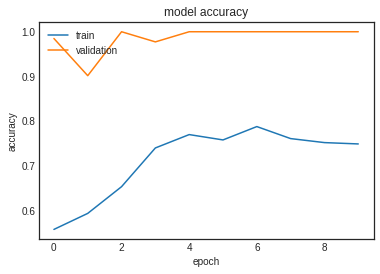

In [139]:
import matplotlib.pyplot as plt
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

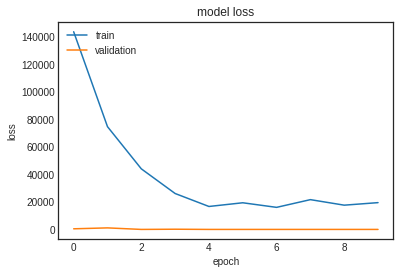

In [140]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [141]:
## Without pretraining

In [146]:
def get_model3():
    with tf.device("GPU:1"):
        nclass = 2
        initializer1 = tf.keras.initializers.RandomNormal
        initializer2 = tf.keras.initializers.Zeros()
        initializer3 = tf.keras.initializers.glorot_uniform(seed=None)
        initializer4 = tf.keras.initializers.lecun_normal(seed=None)
        initializer5 = tf.keras.initializers.TruncatedNormal(mean=0., stddev=1.)

        inp = Input(shape=cqt_input_shape)
        img_1 = LeakyReLU(alpha=0.3)(inp)
        img_1 = Conv2D(128, kernel_size=(7,7), 
                       kernel_initializer=initializer4,  
                       #trainable = False,
                       kernel_regularizer = regularizers.l2(0.001),         
                       #use_bias=True, 
                       #bias_initializer=initializers.Zeros(),
                       padding="valid")(img_1)
        img_1 = Dropout(0.3)(img_1)
        img_1 = LeakyReLU(alpha=0.2)(img_1)
        img_1 = MaxPooling2D()(img_1)
        img_1 = Conv2D(128, kernel_size=(3,3),       
                       kernel_initializer=initializer4, 
                       #trainable = False,
                       kernel_regularizer = regularizers.l2(0.001),            
                       #use_bias=True, 
                       #bias_initializer=initializers.Zeros(),
                       padding="valid")(img_1)
        img_1 = LeakyReLU(alpha=0.2)(img_1)
        img_1 = MaxPooling2D()(img_1)
        img_1 = Dropout(0.3)(img_1)
        img_1 = Conv2D(256, kernel_size=(3,3),       
                       kernel_initializer=initializer4, 
                       kernel_regularizer = regularizers.l2(0.001), 
                       #trainable = False,
                       #use_bias=True, 
                       #bias_initializer=initializers.Zeros(),
                       padding="valid")(img_1)
        img_1 = LeakyReLU(alpha=0.2)(img_1)
        img_1 = Dropout(0.5)(img_1)   
        img_1 = Flatten()(img_1)      
        img_1 = Dense(512, 
                      # kernel_initializer=initializer4,  
                      kernel_regularizer = regularizers.l2(0.001),
                      # trainable = False,
                     )(img_1)
        img_1 = LeakyReLU(alpha=0.2)(img_1)
        img_1 = Dropout(0.5)(img_1)   
        
        img_1 = Dense(128, kernel_initializer=initializer4, trainable = True,
                             kernel_regularizer = regularizers.l2(0.01),
                             use_bias=True, 
                             bias_initializer=initializer4,
                            )(img_1)
        img_1 = LeakyReLU(alpha=0.2)(img_1)
        img_1 = Dropout(0.5)(img_1)   
        
        img_1 = Dense(32, kernel_initializer=initializer4, trainable = True,
                             kernel_regularizer = regularizers.l2(0.01),
                             use_bias=True, 
                             bias_initializer=initializer4,
                            )(img_1)
        img_1 = LeakyReLU(alpha=0.2)(img_1)
        img_1 = Dropout(0.3)(img_1)   


        output_layer = Dense(2,activation=activations.sigmoid)(img_1)
        model = models.Model(inputs=[inp], outputs=[output_layer])
        opt = optimizers.Adam(lr=0.00005, beta_1=0.9, beta_2=0.999, epsilon=1e-5, decay=.03, amsgrad=False)
        model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=['acc'])

        model.summary()


        return model

In [147]:
not_pre_trained = get_model3()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 70, 112, 1)]      0         
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 70, 112, 1)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 106, 128)      6400      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64, 106, 128)      0         
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 64, 106, 128)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 53, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 51, 128)       1475

In [148]:
history_not_pretrained = not_pre_trained.fit([cqt_x_train],[to_categorical(cqt_y_train)], 
                         epochs=10, 
                         batch_size=8,
                         validation_data=([cqt_x_test], to_categorical(cqt_y_test)),
                         callbacks=[mcp_save_, reduce_lr],
                         class_weight=class_weight)

Train on 167 samples, validate on 66 samples
Epoch 1/10
167/167 [==============================] - 7s 40ms/sample - loss: 92823.3010 - acc: 0.5150 - val_loss: 14400.5997 - val_acc: 0.5000
Epoch 2/10
167/167 [==============================] - 4s 26ms/sample - loss: 57712.8979 - acc: 0.5240 - val_loss: 7016.6745 - val_acc: 0.5000
Epoch 3/10
167/167 [==============================] - 4s 26ms/sample - loss: 33664.1810 - acc: 0.5898 - val_loss: 4396.6293 - val_acc: 0.5000
Epoch 4/10
167/167 [==============================] - 4s 26ms/sample - loss: 28128.7382 - acc: 0.5808 - val_loss: 2806.2149 - val_acc: 0.5000
Epoch 5/10
167/167 [==============================] - 4s 26ms/sample - loss: 32255.6131 - acc: 0.5210 - val_loss: 2728.9409 - val_acc: 0.5000
Epoch 6/10
167/167 [==============================] - 4s 26ms/sample - loss: 20560.3543 - acc: 0.5569 - val_loss: 1351.9545 - val_acc: 0.5000
Epoch 7/10
167/167 [==============================] - 4s 26ms/sample - loss: 21894.8706 - acc: 0.5509 